# Prompt Analysis

In [1]:
# %%
import pandas as pd
import os
import json
import sox
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm 

# Download the stopwords if not already downloaded
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lucacasini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# %%
# Function to load JSON data safely
def load_json_safe(filepath):
    try:
        with open(filepath, 'r') as f:
            data = json.load(f)
        # Check if the data can be converted to a DataFrame
        if isinstance(data, dict):
            return pd.DataFrame([data])
        elif isinstance(data, list):
            return pd.DataFrame(data)
        else:
            print(f"Skipping {filepath}, unsupported JSON format")
            return None
    except Exception as e:
        print(f"Error reading {filepath}: {e}")
        return None

# Specify the directories containing the JSON files
suno_path = '/home/laura/aimir/suno/metadata'
# directory2 = '/home/laura/aimir/udio/metadata'

In [52]:
suno_dir = os.listdir(suno_path)[:]
# print(suno_dir)

# Initialize an empty list to store the dataframes
dataframes = []

# Load JSON files from directory1
for filename in tqdm(suno_dir):
    if filename.endswith('.json'):
        filepath = os.path.join(suno_path, filename)
        df = load_json_safe(filepath)
        if df is not None:
            # if the duration is none, calculate it
            if df['duration'].isnull().values.any():
                audio_file = os.path.join('../suno/audio', filename.replace('.json', '.mp3'))
                if os.path.exists(audio_file):
                    df['duration'] = sox.file_info.duration(audio_file)
                else:
                    print(f"Audio file not found: {audio_file}")
            # add the filename as a column
            df['filename'] = filename
            df['service'] = 'suno'
            dataframes.append(df)
            
# %%
# Combine the dataframes into a joint dataframe if there are any dataframes loaded
if dataframes:
    joint_df = pd.concat(dataframes, ignore_index=True)
    joint_df.dropna(subset=['prompt'], inplace=True)
    # Print the joint dataframe
    # print(joint_df)
else:
    print("No valid JSON files were found.")
    
joint_df.columns

  0%|          | 0/22634 [00:00<?, ?it/s]

100%|██████████| 22634/22634 [01:47<00:00, 209.94it/s]


Index(['id', 'video_url', 'audio_url', 'image_url', 'image_large_url',
       'is_video_pending', 'major_model_version', 'model_name', 'metadata',
       'is_liked', 'user_id', 'display_name', 'handle', 'is_handle_updated',
       'is_trashed', 'reaction', 'created_at', 'status', 'title', 'play_count',
       'upvote_count', 'is_public', 'tags', 'prompt', 'gpt_description_prompt',
       'audio_prompt_id', 'history', 'concat_history', 'type', 'duration',
       'refund_credits', 'stream', 'error_type', 'error_message',
       'avatar_image_url', 'filename', 'service'],
      dtype='object')

In [55]:
joint_df.shape
joint_df.head()

,id,video_url,audio_url,image_url,image_large_url,is_video_pending,major_model_version,model_name,metadata,is_liked,...,concat_history,type,duration,refund_credits,stream,error_type,error_message,avatar_image_url,filename,service
0,00007e10-f985-4a0a-86b2-21ead5931104,https://cdn1.suno.ai/00007e10-f985-4a0a-86b2-2...,https://cdn1.suno.ai/00007e10-f985-4a0a-86b2-2...,https://cdn1.suno.ai/00007e10-f985-4a0a-86b2-2...,https://cdn1.suno.ai/00007e10-f985-4a0a-86b2-2...,False,v3,chirp-v3,NaN,False,...,[{'id': '3673c2c9-2e4d-4bdd-95c0-5f5e0e62a1f1'...,concat,224.999979,None,None,None,None,None,00007e10-f985-4a0a-86b2-21ead5931104.json,suno
1,0001502a-0e37-4f0c-808c-291227190c93,https://cdn1.suno.ai/0001502a-0e37-4f0c-808c-2...,https://cdn1.suno.ai/0001502a-0e37-4f0c-808c-2...,https://cdn1.suno.ai/image_509f8fa0-fc75-4915-...,https://cdn1.suno.ai/image_large_509f8fa0-fc75...,False,v3,chirp-v3,NaN,False,...,[{'id': '44db2a47-90bb-459b-88ac-63465d8b4ba5'...,concat,180.559979,None,None,None,None,NaN,0001502a-0e37-4f0c-808c-291227190c93.json,suno
2,000673ea-a2a1-4412-bc23-beb063ff2e97,https://cdn1.suno.ai/000673ea-a2a1-4412-bc23-b...,https://cdn1.suno.ai/000673ea-a2a1-4412-bc23-b...,https://cdn1.suno.ai/image_1e3a767a-cd43-4994-...,https://cdn1.suno.ai/image_large_1e3a767a-cd43...,False,v3,chirp-v3,NaN,False,...,[{'id': '9c72831f-bd21-466d-a401-97e4666e3038'...,concat,178.279979,None,None,None,None,NaN,000673ea-a2a1-4412-bc23-beb063ff2e97.json,suno
3,000bd1f5-48c2-4fd9-9adf-b8a072cb8840,https://cdn1.suno.ai/000bd1f5-48c2-4fd9-9adf-b...,https://cdn1.suno.ai/000bd1f5-48c2-4fd9-9adf-b...,https://cdn1.suno.ai/image_4d443861-f02c-436e-...,https://cdn1.suno.ai/image_large_4d443861-f02c...,False,v3,chirp-v3,NaN,False,...,[{'id': '23859733-e872-4c40-b2ce-1f7b916ed9eb'...,concat,178.439979,None,None,None,None,NaN,000bd1f5-48c2-4fd9-9adf-b8a072cb8840.json,suno
4,000bdaed-d318-4c49-afc3-f0cacc614308,https://cdn1.suno.ai/000bdaed-d318-4c49-afc3-f...,https://cdn1.suno.ai/000bdaed-d318-4c49-afc3-f...,https://cdn1.suno.ai/image_27fe53b1-e502-4445-...,https://cdn1.suno.ai/image_large_27fe53b1-e502...,False,v3,chirp-v3,NaN,False,...,[{'id': '03d9f715-7c0f-4777-a095-04268643ce80'...,concat,103.879979,None,None,None,None,NaN,000bdaed-d318-4c49-afc3-f0cacc614308.json,suno


In [56]:
from IPython.display import Audio

def visualize(df, i=0):
    """_summary_
    Args:
        df (pandas dataframe): dataframe with metadata from suno/udio
        i (int, optional): index in the dataframe to visualize. Defaults to 0.
    """
    print(
        f'id : {joint_df.iloc[i]["id"]} \n' +
        f'tags : {joint_df.iloc[i]["tags"]} \n' +
        f'title : {joint_df.iloc[i]["title"]} \n' +
        f'prompt :\n {joint_df.iloc[i]["prompt"]} \n'
    )
    return Audio('../suno/audio/' + joint_df.iloc[i].filename.replace('.json', '.mp3'))  

# visualize(joint_df, 3)

In [57]:
# topic modeling on tags using sklearn
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

from time import time

import matplotlib.pyplot as plt

# from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation, MiniBatchNMF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

n_samples = 2000
n_features = 500
n_components = 5
n_top_words = 20
batch_size = 128
init = "nndsvda"


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

print("Loading dataset...")
t0 = time()
# data, _ = fetch_20newsgroups(
#     shuffle=True,
#     random_state=1,
#     remove=("headers", "footers", "quotes"),
#     return_X_y=True,
# )
# data_samples = data[:n_samples]
print("done in %0.3fs." % (time() - t0))

# data_samples[0]
data_samples = [prompt.strip() for prompt in joint_df['prompt'].astype(str).values.tolist() if prompt is not None]
data_samples[0]

Loading dataset...
done in 0.000s.


'[piano solo]\n[piano solo]\n\n\n[drum solo]\n\n\nend\n\n[end]'

Extracting tf-idf features for NMF...
done in 4.167s.
Extracting tf features for LDA...
done in 4.124s.



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...
done in 30.455s.


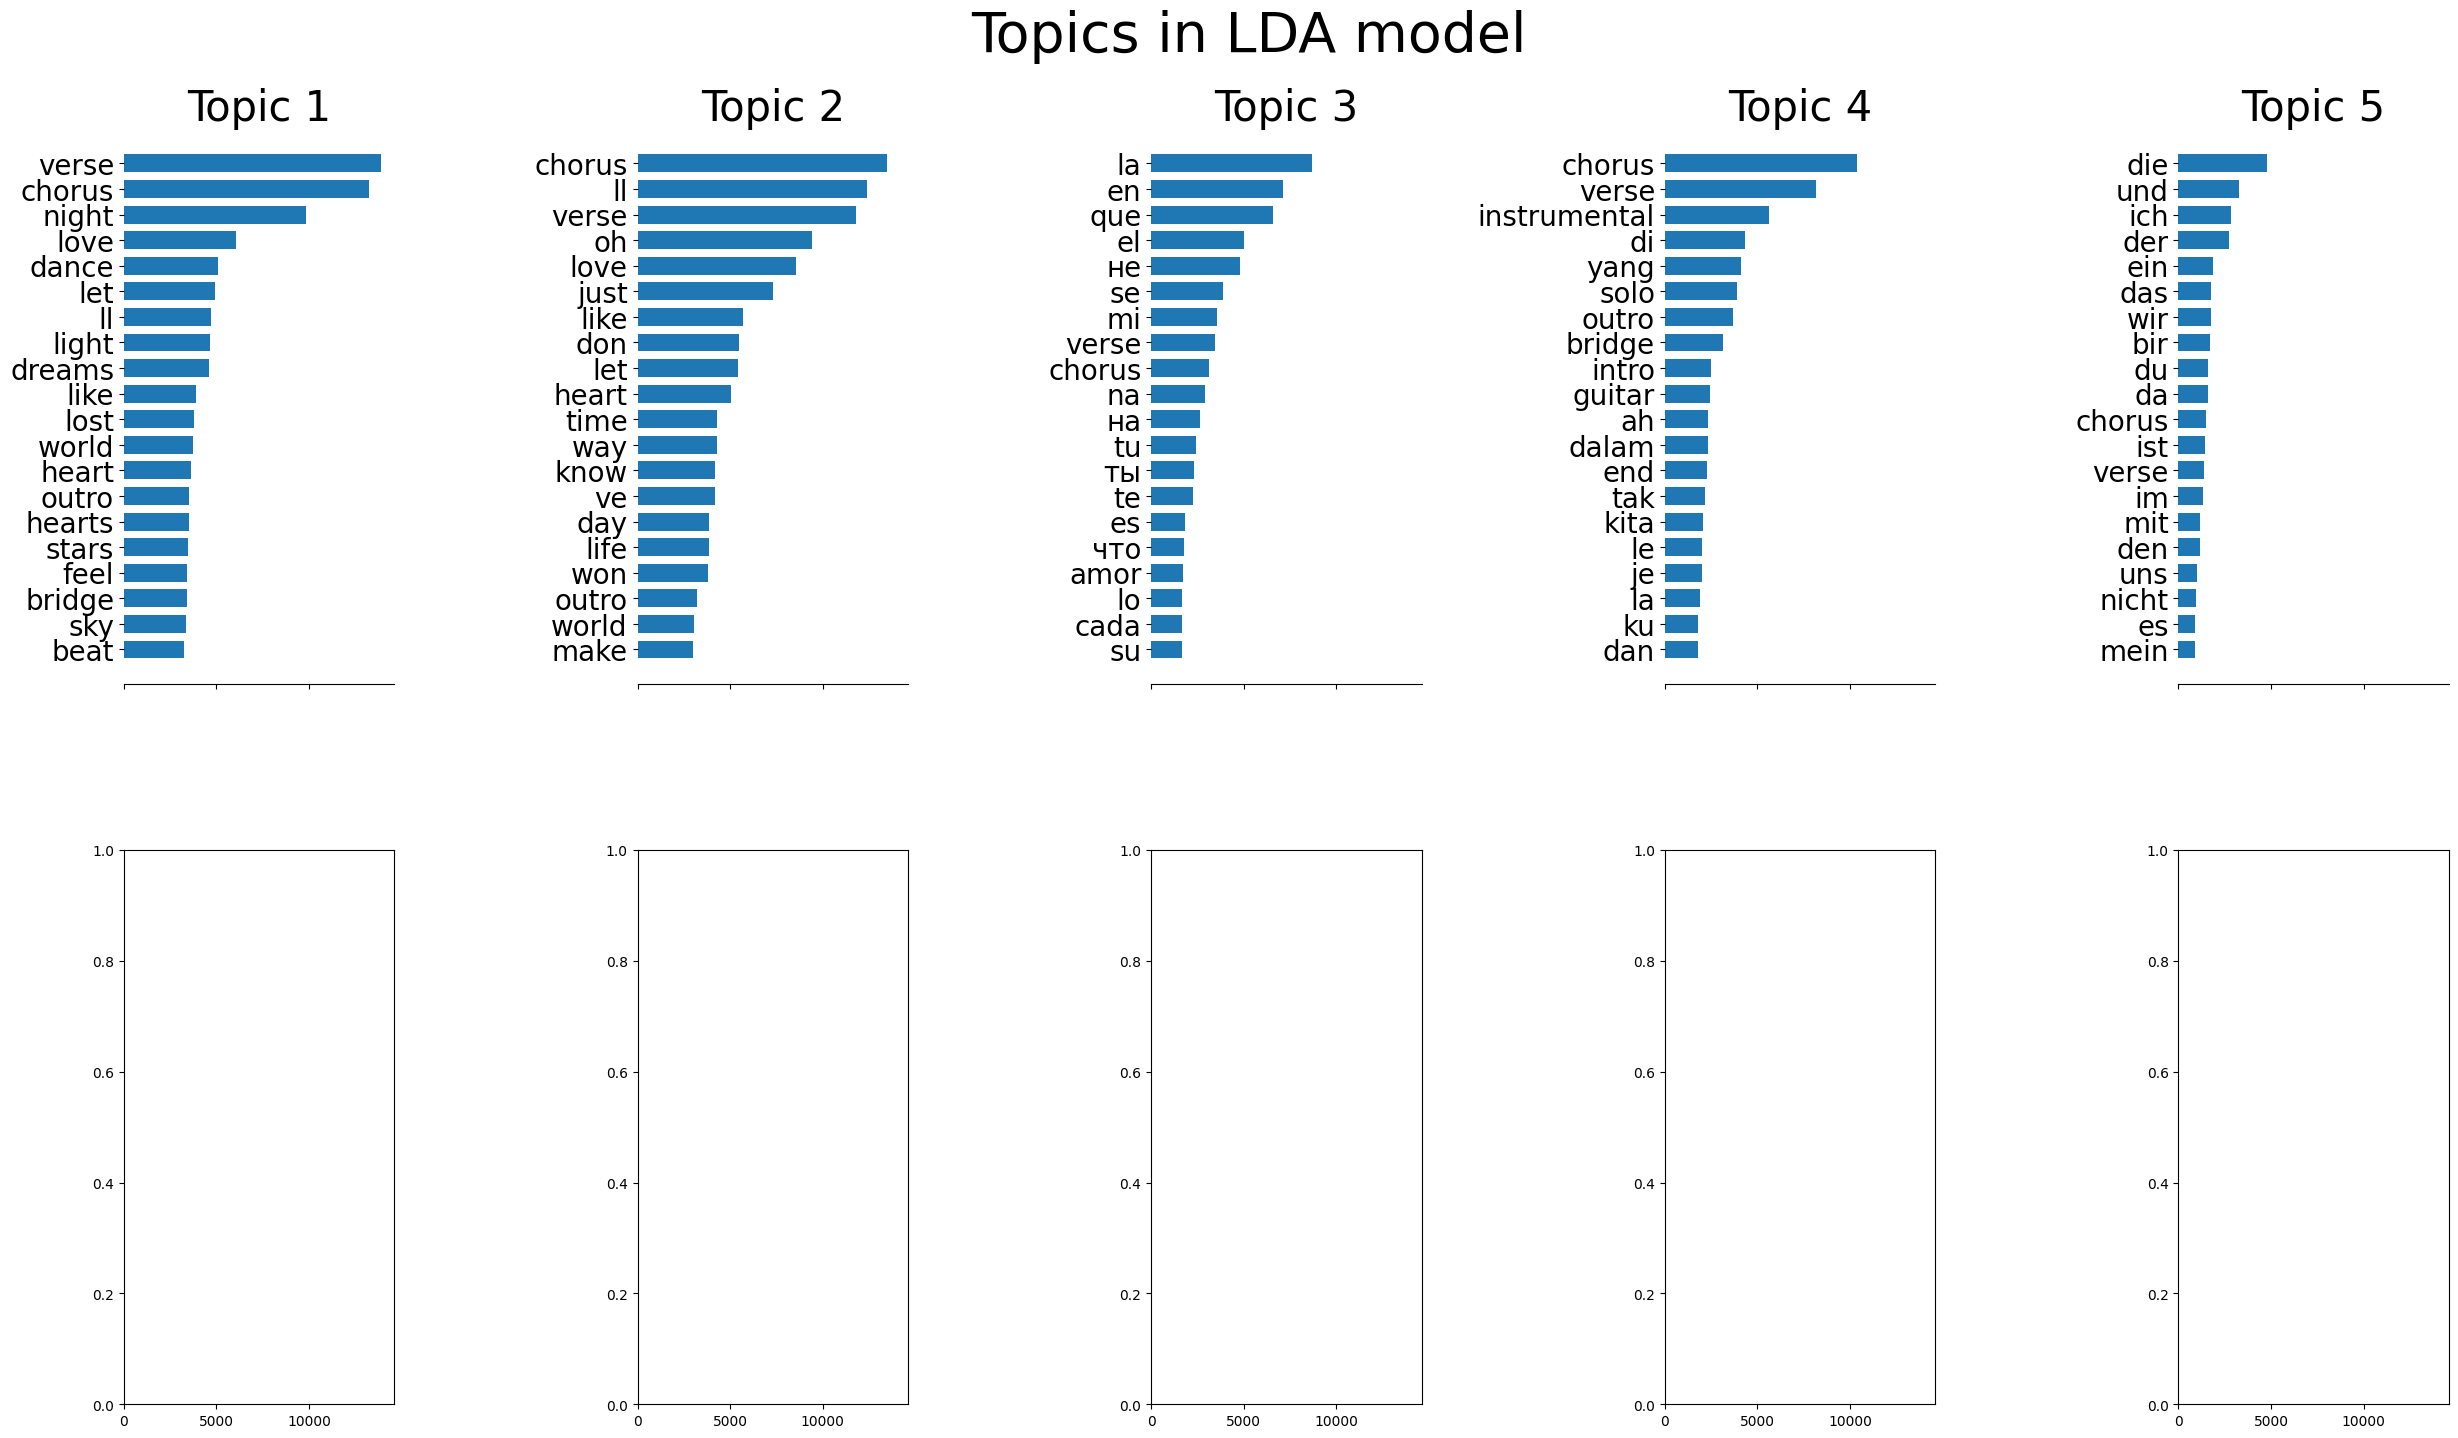

In [60]:
# # Use tf-idf features for NMF.
# print("Extracting tf-idf features for NMF...")
# tfidf_vectorizer = TfidfVectorizer(
#     max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
# )
# t0 = time()
# tfidf = tfidf_vectorizer.fit_transform(data_samples)
# print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

# # Fit the NMF model
# print(
#     "Fitting the NMF model (Frobenius norm) with tf-idf features, "
#     "n_samples=%d and n_features=%d..." % (n_samples, n_features)
# )
# t0 = time()
# nmf = NMF(
#     n_components=n_components,
#     random_state=1,
#     init=init,
#     beta_loss="frobenius",
#     alpha_W=0.00005,
#     alpha_H=0.00005,
#     l1_ratio=1,
# ).fit(tfidf)
# print("done in %0.3fs." % (time() - t0))


# tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
# plot_top_words(
#     nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
# )

# # Fit the NMF model
# print(
#     "\n" * 2,
#     "Fitting the NMF model (generalized Kullback-Leibler "
#     "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
#     % (n_samples, n_features),
# )
# t0 = time()
# nmf = NMF(
#     n_components=n_components,
#     random_state=1,
#     init=init,
#     beta_loss="kullback-leibler",
#     solver="mu",
#     max_iter=1000,
#     alpha_W=0.00005,
#     alpha_H=0.00005,
#     l1_ratio=0.5,
# ).fit(tfidf)
# print("done in %0.3fs." % (time() - t0))

# tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
# plot_top_words(
#     nmf,
#     tfidf_feature_names,
#     n_top_words,
#     "Topics in NMF model (generalized Kullback-Leibler divergence)",
# )

# # Fit the MiniBatchNMF model
# print(
#     "\n" * 2,
#     "Fitting the MiniBatchNMF model (Frobenius norm) with tf-idf "
#     "features, n_samples=%d and n_features=%d, batch_size=%d..."
#     % (n_samples, n_features, batch_size),
# )
# t0 = time()
# mbnmf = MiniBatchNMF(
#     n_components=n_components,
#     random_state=1,
#     batch_size=batch_size,
#     init=init,
#     beta_loss="frobenius",
#     alpha_W=0.00005,
#     alpha_H=0.00005,
#     l1_ratio=0.5,
# ).fit(tfidf)
# print("done in %0.3fs." % (time() - t0))


# tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
# plot_top_words(
#     mbnmf,
#     tfidf_feature_names,
#     n_top_words,
#     "Topics in MiniBatchNMF model (Frobenius norm)",
# )

# # Fit the MiniBatchNMF model
# print(
#     "\n" * 2,
#     "Fitting the MiniBatchNMF model (generalized Kullback-Leibler "
#     "divergence) with tf-idf features, n_samples=%d and n_features=%d, "
#     "batch_size=%d..." % (n_samples, n_features, batch_size),
# )
# t0 = time()
# mbnmf = MiniBatchNMF(
#     n_components=n_components,
#     random_state=1,
#     batch_size=batch_size,
#     init=init,
#     beta_loss="kullback-leibler",
#     alpha_W=0.00005,
#     alpha_H=0.00005,
#     l1_ratio=0.5,
# ).fit(tfidf)
# print("done in %0.3fs." % (time() - t0))

# tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
# plot_top_words(
#     mbnmf,
#     tfidf_feature_names,
#     n_top_words,
#     "Topics in MiniBatchNMF model (generalized Kullback-Leibler divergence)",
# )

print(
    "\n" * 2,
    "Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
lda = LatentDirichletAllocation(
    n_components=5,#n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")


### other stuff

In [3]:
# %%




# Load JSON files from directory2
for filename in os.listdir(directory2):
    if filename.endswith('.json'):
        filepath = os.path.join(directory2, filename)
        df = load_json_safe(filepath)
        # if the duration is none, calculate it
        if df['duration'].isnull().values.any():
            audio_file = os.path.join('/home/laura/aimir/udio/audio', filename.replace('.json', '.mp3'))
            if os.path.exists(audio_file):
                df['duration'] = sox.file_info.duration(audio_file)
            else:
                print(f"Audio file not found: {audio_file}")
        # add the filename as a column
        if df is not None:
            df['filename'] = filename
            df['service'] = 'udio'
        if df is not None:
            dataframes.append(df)



# %%
#save the joint dataframe to a CSV file
if joint_df is not None:
    joint_df.to_csv('joint_dataframe.csv', index=False)
    
# %%
# load joint dataframe from CSV file
joint_df = pd.read_csv('joint_dataframe.csv')
# %%
# print the column names
if joint_df is not None:
    print(joint_df.columns)

# %%
# print how many of the rows have duration
if 'duration' in joint_df.columns:
    print(joint_df['duration'].count())

# print the id of the ones that don't have duration
if 'duration' in joint_df.columns:
    print(joint_df[joint_df['duration'].isnull()]['id'])
#%%

# if play_count is null, take the value from the plays column
if 'play_count' in joint_df.columns:
    joint_df['play_count'] = joint_df['play_count'].fillna(joint_df['plays'])

# sort by play_count in descending order
if 'play_count' in joint_df.columns:
    joint_df = joint_df.sort_values(by='play_count', ascending=False)

# %%
# Get the list of English stop words
stop_words = set(stopwords.words('english'))
# make the play_count column an integer
if 'play_count' in joint_df.columns:
    joint_df['play_count'] = joint_df['play_count'].astype(int)
print(joint_df.head(2)[['id', 'prompt']].to_string(index=False))
# %%
# grab the tags and prompt of the top 50 rows and find which words are the most common
if 'play_count' in joint_df.columns:
    top_prompts = joint_df[['tags', 'prompt', 'play_count']].head(50)

    # Add the tags to the beginning of the prompt
    top_prompts['prompt'] = top_prompts['tags'] + ' ' + top_prompts['prompt']
    top_prompts['prompt'] = top_prompts['prompt'].str.lower()
    
    # Remove punctuation
    top_prompts['prompt'] = top_prompts['prompt'].str.replace('[^\w\s]', '', regex=True)
    
    # Fill NaN values with empty strings to avoid TypeError
    top_prompts['prompt'] = top_prompts['prompt'].fillna('')
    
    # Split the prompts into words
    top_prompts['prompt'] = top_prompts['prompt'].str.split()
    
    # Filter out stop words
    top_prompts['prompt'] = top_prompts['prompt'].apply(lambda x: [word for word in x if word not in stop_words])
    # remove numbers (even if they are written as words like 'one' 'two' etc)
    top_prompts['prompt'] = top_prompts['prompt'].apply(lambda x: [word for word in x if word not in ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']])
    top_prompts['prompt'] = top_prompts['prompt'].apply(lambda x: [word for word in x if not word.isdigit()])
    # remove 'chorus', 'verse' and 'outro'
    top_prompts['prompt'] = top_prompts['prompt'].apply(lambda x: [word for word in x if word not in ['chorus', 'verse', 'outro', 'bridge']])

    # Explode the list of words into separate rows
    top_prompts = top_prompts.explode('prompt')
    
    # Get the top words by play_count
    top_words = top_prompts.groupby('prompt')['play_count'].sum().sort_values(ascending=False)

    # Print the top words
    print(top_words.head(20))
    # plot
    top_words.head(30).plot(kind='bar')


KeyboardInterrupt: 